### **Training a model on MNIST dataset**




---

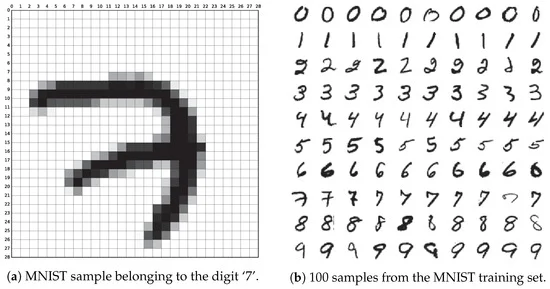


---


The **MNIST** dataset (Modified National Institute of Standards and Technology) is a widely used collection of 70,000 grayscale images of handwritten digits (0-9), with 60,000 images for training and 10,000 for testing. It is often used as a benchmark for evaluating machine learning models, particularly in the fields of image recognition and classification. Each image is 28x28 pixels, and the dataset includes corresponding labels that represent the digit in the image.
This dataset in **bold text**

---

To insert the MNIST dataset into the code you shared earlier, you can load the dataset using TensorFlow's built-in **mnist.load_data()** function, which provides the data as training and testing sets. Since you've already included the **preprocess_data** function in the code, here's how you can integrate it:

Import the MNIST dataset: You've already imported mnist in the **preprocess_data()** function. This function loads the dataset, reshapes the images, and normalizes them.

Preprocess the dataset: The **preprocess_data()** function will be called to load, preprocess, and split the data into training and testing sets. This function is already included in your script.

Use the data for training the model: The data returned by **preprocess_data()** will be used for model training, validation, and evaluation. You don't need to make any additional changes if the function is already written correctly.

> Add blockquote



---
**I hope it helps you**


At first we add necessary libraries wich is
tensorflow
tensirflow.keras
tensorflow.heras.dataset
google.colab as drive and files
and at the end ad the OS library

In [3]:
#adding the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from google.colab import drive, files
import os

his code defines constants for image size, number of classes, batch size, epochs, and the model's save filename, ensuring readability and easy modification throughout the script.

In [4]:
# Constants
IMG_HEIGHT, IMG_WIDTH = 28, 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
MODEL_FILENAME = "mnist_cnn.h5"

In this part i add this function to save the result in google drive

In [6]:
# Prepare Google Drive (optional)
def setup_drive():
    drive.mount('/content/drive')
    save_path = "/content/drive/MyDriveYOUR FOLDER NAME"
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    return save_path

This function loads the MNIST dataset, reshapes the images to include a channel dimension (28, 28, 1), normalizes pixel values to the range [0, 1], and converts the labels into one-hot encoded format for training and evaluation.

In [7]:
# Load and preprocess data
def preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1).astype("float32") / 255.0
    x_test = x_test.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1).astype("float32") / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)
    return (x_train, y_train), (x_test, y_test)


This function defines a sequential CNN model with two convolutional layers (using ReLU activation), max pooling layers, a flattening layer, and two dense layers, including a softmax output layer for classification. It compiles the model with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

In [8]:
# Create CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(NUM_CLASSES, activation="softmax"),
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [9]:
# Train the model
def train_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))
    return model

In this part i save the code on google drive base on the path that i give

In [10]:
# Save the model locally and to Google Drive
def save_model(model, drive_path=None):
    local_path = f"./{MODEL_FILENAME}"
    model.save(local_path)
    print(f"Model saved locally at {local_path}")
    files.download(local_path)
    if drive_path:
        drive_save_path = os.path.join(drive_path, MODEL_FILENAME)
        model.save(drive_save_path)
        print(f"Model also saved to Google Drive at {drive_save_path}")

This code is the main workflow for training and saving a CNN model using TensorFlow. It optionally sets up Google Drive for saving the model remotely, preprocesses the MNIST dataset, builds and trains the CNN model using the training data, evaluates it on the test data, and saves the trained model locally and optionally to Google Drive. The evaluation results (test accuracy and loss) are then printed. The script executes this logic when run directly.


In [11]:
# Main logic
def main():
    # Optional: Set up Google Drive
    try:
        drive_save_path = setup_drive()
    except Exception as e:
        print("Failed to set up Google Drive. Saving only locally.")
        drive_save_path = None

    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = preprocess_data()

    # Build and train the model
    model = build_model()
    model = train_model(model, x_train, y_train, x_test, y_test)

    # Save the trained model
    save_model(model, drive_save_path)

    # Evaluate the model
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

if __name__ == "__main__":
    main()


Mounted at /content/drive
Failed to set up Google Drive. Saving only locally.
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.8737 - loss: 0.4624 - val_accuracy: 0.9801 - val_loss: 0.0623
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - accuracy: 0.9814 - loss: 0.0604 - val_accuracy: 0.9877 - val_loss: 0.0392
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.9877 - loss: 0.0380 - val_accuracy: 0.9887 - val_loss: 0.0346
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.9888 - val_loss: 0.0317
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9934 - loss: 0.0217 - val_accuracy: 0.9900 - val_loss: 0.0316
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9939 - loss: 0.0187 - val_accuracy: 0.9906 - val_loss: 0.0289
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9902 - val_loss: 0.0298
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9966 - loss: 0

Model saved locally at ./mnist_cnn.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Accuracy: 0.9902, Test Loss: 0.0351
